<h1>Assignment – Preprocessing Data for scikit-learn</h1>
<h4>Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis. In this
assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4.<br>
Mushrooms Dataset. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository
here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the
data science community has made it a good dataset to use for comparative benchmarking. For example, if someone
was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data,
this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute
or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”<br>
Your assignment is to
    <ul>
        <li>First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to
look around a bit, but it’s there!</li>
        <li>Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column
that indicates edible or poisonous, the column that includes odor, and at least one other column of your
choosing.</li>
        <li>Add meaningful names for each column.</li>
        <li>Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might
become 0 and “p” might become 1. This is because your downstream processing in Project 4 using
scikit-learn requires that values be stored as numerics.</li>
        <li>Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and
show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.</li>
        <li>Include some text describing your preliminary conclusions about whether either of the other columns
could be helpful in predicting if a specific mushroom is edible or poisonous.</li>
    </ul>
</h4>

In [1]:
import pandas as pd
import seaborn as sns

<h5>Columns Key:</h5>
<ol>
    <li>Deadly; edible=e, poisonous=p</li>
    <li>Odor; almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s</li>
    <li>Habitat; grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d</li>
</ol>

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
cols = [0, 5, 22]
names = ["Deadly", "Odor", "Habitat"]

mushrooms = pd.read_csv(url, usecols=cols, names=names)
mushrooms_1 = mushrooms.copy()
mushrooms

,Deadly,Odor,Habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g
...,...,...,...
8119,e,n,l
8120,e,n,l
8121,e,n,l
8122,p,y,l


<h5>Change columns to numerical values</h5>

In [3]:
mushrooms.replace(to_replace={'Deadly':{'e': 0, 'p': 1}}, inplace = True)
mushrooms.replace(to_replace={'Odor':{'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8}}, inplace = True)
mushrooms.replace(to_replace={'Habitat':{'g': 0, 'l': 1, 'm': 2, 'p': 3, 'u': 4, 'w': 5, 'd': 6}}, inplace = True)
mushrooms

,Deadly,Odor,Habitat
0,1,7,4
1,0,0,0
2,0,1,2
3,1,7,4
4,0,6,0
...,...,...,...
8119,0,6,1
8120,0,6,1
8121,0,6,1
8122,1,3,1


<h5>Plot the Data</h5>

In [4]:
mushrooms_1.replace(to_replace={'Deadly':{'e': 'Edible', 'p': 'Poisonous'}}, inplace = True)
mushrooms_1.replace(to_replace={'Odor':{'a': 'Almond', 'l': 'Anise', 'c': 'Creosote', 'y': 'Fishy', 'f': 'Foul', 'm': 'Musty', 'n': 'None', 'p': 'Pungent', 's': 'Spicy'}}, inplace = True)
mushrooms_1.replace(to_replace={'Habitat':{'g': 'Grasses', 'l': 'Leaves', 'm': 'Meadow', 'p': 'Paths', 'u': 'Urban', 'w': 'Woods', 'd': 'Waste'}}, inplace = True)

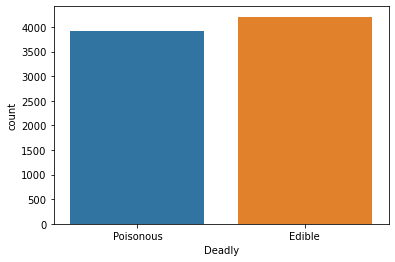

In [5]:
sns.countplot(x='Deadly', data=mushrooms_1)

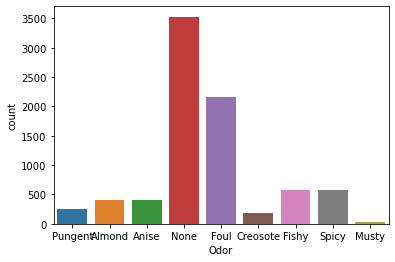

In [6]:
sns.countplot(x='Odor', data=mushrooms_1)

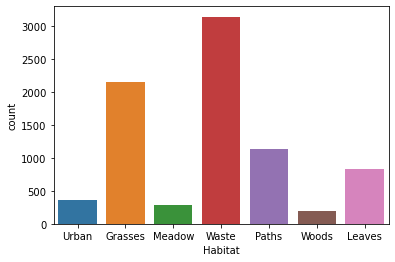

In [7]:
sns.countplot(x='Habitat', data=mushrooms_1)

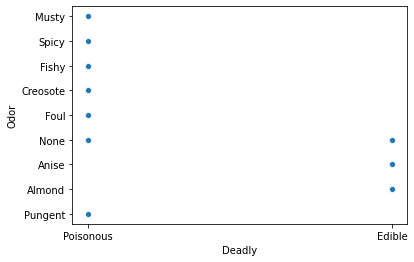

In [8]:
sns.scatterplot(x="Deadly", y='Odor', data=mushrooms_1)

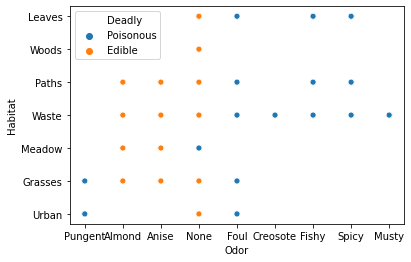

In [9]:
sns.scatterplot(x="Odor", y='Habitat', hue='Deadly', data=mushrooms_1)